## Agrupació

Els algorismes d'agrupació pertanyen a la categoria de métodes d'aprenentge no supervisat, en el que no tenim unes dades resultat que ens permetin entrenar un model per un conjunt de dades de partida. Aquests algorismes ens permeten trobar agrupacions o perfils d'instàncies, que utilitzarem per trobar grups de dades amb un mateix perfil o que segueixen un mateix patró.

In [1]:
#A partir del fitxer de dades preprocessades seleccionarem els atributs que ens interesa analitzar 
# i farem les transformacions que estimem convenients.

#Llegim el fitxer amb les dades preprocessades
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

fitxer="D:/Users/X/Downloads/smoking_drinking_dataset_pre.csv"
dataset=pd.read_csv(fitxer,encoding='utf-8',sep=',')

# Seleccionem les variables que volem incloure en el model de classificació
df=dataset[['PAS', 'PAD','NGS','colesterol_total', 'colesterol_LDL','colesterol_HDL',
            'triglicerid', 'hemoglobina', 'creatinina',
            'transaminasa_AST', 'transaminasa_ALT', 'transferasa_GGT',
            'genere_num','bevedor_num','nivell_fumador_num'
          ]]
#print(df.shape)
#Reduim la mostra perque el cost de dibuixar l'arbre de decissió és massa alt
df=df.sample(n=1000,random_state=1)
df.reset_index(drop=True,inplace=True)

# Transformació de dades.
# En aquest cas he decidit normalitzar les dades perquè tots els atributs tinguin valors entre 0 i 1

from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import normalize

columnes=df.columns
#print(columnes)
#df_cat=df[['genere_num','bevedor_num','nivell_fumador_num']]
#columnes numeriques continues
df_num=df[['PAS', 'PAD','NGS','colesterol_total', 'colesterol_LDL','colesterol_HDL',
            'triglicerid', 'hemoglobina', 'creatinina',
            'transaminasa_AST', 'transaminasa_ALT', 'transferasa_GGT']]

# columnes categoriques
df_bin=df[['genere_num','bevedor_num','nivell_fumador_num']]

#Transformacio de les dades
#Utilitzem MinMaxScaler per disposar els atributs del dataframe en la mateixa escala
#scaler = MinMaxScaler()
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df[df.columns[0:-3]])
df_scaled=pd.DataFrame(df_scaled)
#incorporem nom de les columnes
df_scaled.columns=['PAS', 'PAD','NGS','colesterol_total', 'colesterol_LDL','colesterol_HDL',
            'triglicerid', 'hemoglobina', 'creatinina',
            'transaminasa_AST', 'transaminasa_ALT', 'transferasa_GGT']
#afegim les columnes categòriques
df_scaled = pd.concat([df_scaled,df_bin], axis = 1,ignore_index=True)
df_scaled.columns=columnes
#print(columnes)
df=df_scaled
df

,PAS,PAD,NGS,colesterol_total,colesterol_LDL,colesterol_HDL,triglicerid,hemoglobina,creatinina,transaminasa_AST,transaminasa_ALT,transferasa_GGT,genere_num,bevedor_num,nivell_fumador_num
0,0.495235,0.999103,1.389046,0.534399,-0.487250,1.501349,1.028764,-0.157148,-0.756987,0.772345,0.220753,0.229663,0,1,1
1,-0.491682,-0.885997,-0.990331,0.319436,0.596699,0.590967,-1.280033,-0.883463,-1.249656,0.096746,-0.468023,-0.834061,0,0,1
2,-1.675981,-0.985213,-0.990331,-0.701641,-0.633729,0.655995,-1.010174,-0.619348,-0.756987,-0.443734,-0.640217,-0.986021,0,0,1
3,-0.096915,0.304592,-0.582438,0.937456,0.479516,-0.514495,2.003256,0.701224,-1.249656,-0.713974,0.306850,0.027049,1,1,3
4,0.824207,1.197534,0.165367,-0.862864,-0.370066,-1.099740,-0.140627,0.371081,0.228352,-0.984213,0.392946,0.888159,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,-0.689065,-1.382076,0.301331,1.636088,1.094730,1.826485,-0.320533,-1.279634,-0.264317,-1.119333,-0.468023,-0.834061,0,1,1
996,0.034674,-0.687565,-0.106562,0.400047,0.215852,1.046158,-0.650361,-0.289205,-1.742326,-1.389573,-1.328992,-1.137982,0,1,1
997,-0.162710,-0.489134,-0.650420,-0.782252,-0.721617,0.395886,-0.740314,-0.949491,-0.756987,-0.443734,-0.898508,-0.834061,0,0,1
998,-0.162710,-0.092271,-0.786384,1.233031,1.387689,0.395886,-0.515431,-0.751405,-0.264317,0.907465,-0.381926,-0.276872,0,0,1


K-means Algorithm

L'objectiu de l'algorisme k-means és dividir el conjunt de dades en grups, anomenats clusters, de manera que els individus dins d'un cluster siguin més similars entre ells que amb dades d'altres clusters.  
El procés comença amb la selecció de k punts anomenats centroides que representen el centre inicial de cada grup.
Per cada instancia del dataset es calcula la distància a tots els centroides, y se l'asigna al que estigui més a prop (distància euclidiana).  
Quan tots els punts s'han asignat a un cluster es recalcula el centroide com a promig de tots els punts del cluster. Aquests nous centriodes passen a ser el nou centre del cluster.  
Els pasos d'asignació de punts a clusters es repeteixen iterativament fins que es compleixi un criteri de finalització (canvis poc significatius o nombre màxim d'iteracions superat).  
És important destacar que el valor k és un valor preestablert a l'inici de l'algorisme i que aquest dependrà gran manera en aquesta decisió. Afortunadament veurem mecanismes que ens donen pistes per la seva elecció.


In [2]:
#Creacio del model
import matplotlib.pyplot as plt
import seaborn as sns
from kneed import KneeLocator
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import normalize
import warnings
warnings.simplefilter('ignore')

kmeans = KMeans(
    init="random",
    n_clusters=3, #provem amb un valor aleatori i posteriorment veurem quin es el valor optim
    n_init=10,
    max_iter=300,
    random_state=42
)

kmeans.fit(df)

# The lowest SSE value
# Aquest atribut es la suma de les distàncies al quadrat entre tots els punts 
# y els centroides dels clusters als que pertanyen. 
# Representa la mesura de la dispersión de les dades dins dels clusters. 
# Quant menor sigui el valor de inertia_, més compactes y cohesionats seran els clusters.
print("Menor error:",kmeans.inertia_)

# Final locations of the centroid
print("Centroids:",kmeans.cluster_centers_)

# The number of iterations required to converge
print("Iteracions aplicades:",kmeans.n_iter_)

print("Mostra d'asignació de clusters:",kmeans.labels_[:5])
#print(len(kmeans.labels_))
warnings.resetwarnings()


Menor error: 9955.698289563868
Centroids: [[-0.39417342 -0.42489333 -0.38721288 -0.43261445 -0.42212425  0.40664564
  -0.56975562 -0.53875219 -0.44921598 -0.42299595 -0.58488359 -0.60302237
   0.25659472  0.41966427  1.30215827]
 [ 0.34764779  0.39633303  0.51459039 -0.31671275 -0.41210367 -0.42987092
   0.62489903  0.62094921  0.43588095  0.79571373  0.9873692   0.95494492
   0.85273973  0.69520548  2.        ]
 [ 0.21600398  0.21117276  0.03851332  0.93773316  1.01841953 -0.15137086
   0.18940749  0.14894327  0.20634305 -0.19229931 -0.15263006 -0.09410169
   0.61168385  0.45704467  1.73883162]]
Iteracions aplicades: 22
Mostra d'asignació de clusters: [1 0 0 2 1]


<Axes: xlabel='label', ylabel='Count'>

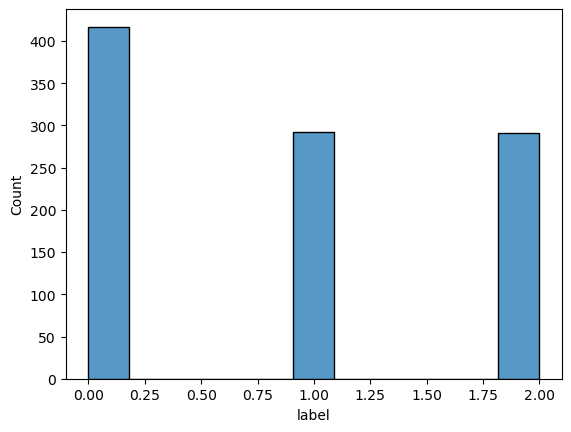

In [3]:
#%% Etiquetem el dataframe original.
labels = kmeans.predict(df)
#Afegim una columna amb la classificacio
df['label'] = labels
#print(df.to_string())

sns.histplot(x=df['label'])

Mirem quin es el millor nombre de clusters pel metode del colze (elbow method)

[13897.158, 11219.829157330038, 9955.698289563868, 9339.326298629152, 8932.672284871554, 8569.284046200155, 8234.074393433119, 8006.715798799956, 7801.743172333196]


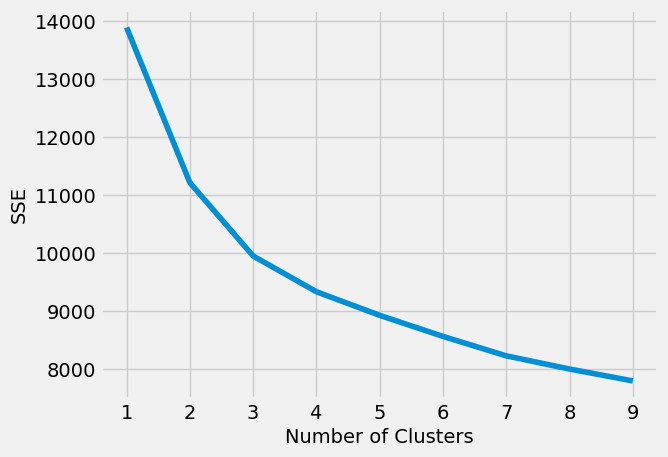

In [4]:
# Guardem en una llista l'error SSE per cada nombre de clusters
warnings.simplefilter('ignore')

sse = []
for k in range(1, 10):
    kmeans = KMeans(n_clusters=k,
                    init="random",
                    n_init= 10,
                    max_iter= 300,
                    random_state= 42)
    kmeans.fit(df)
    sse.append(kmeans.inertia_)
print(sse)  
#visualitzem
plt.style.use("fivethirtyeight")
plt.plot(range(1, 10), sse)
plt.xticks(range(1, 10))
plt.xlabel("Number of Clusters")
plt.ylabel("SSE")
plt.show()

warnings.resetwarnings()



3

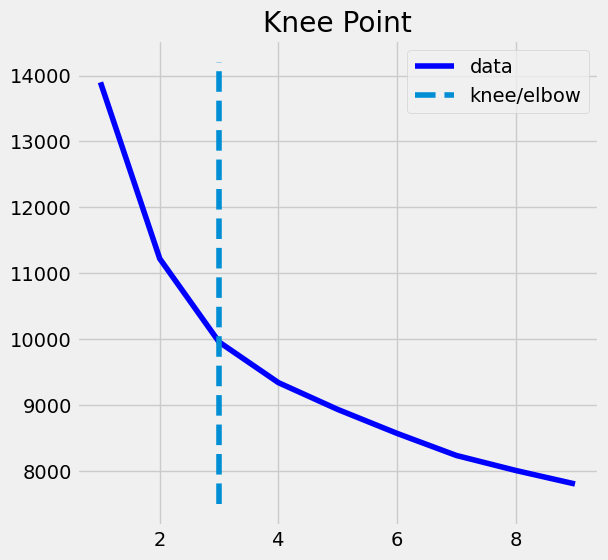

In [5]:
from kneed import KneeLocator, DataGenerator as dg
#x, y = dg.convex_increasing()
kl = KneeLocator(range(1,10), sse, curve="convex",direction="decreasing")
kl.plot_knee()
kl.elbow

Utilitzem ara el metode Silhouette, per veure el rendiment de l'algorisme

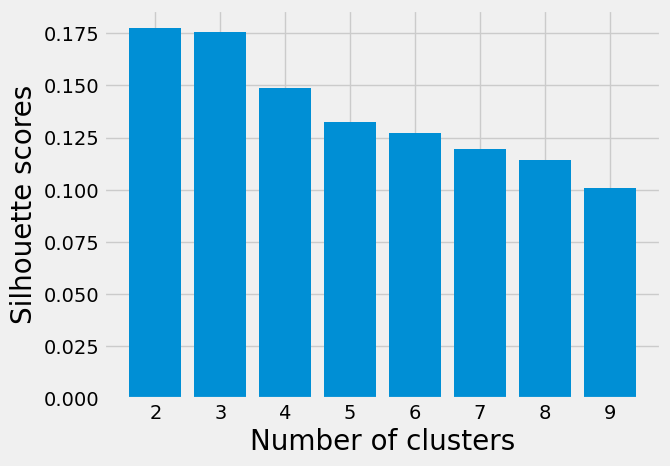

[0.17735688065371216, 0.1755065512405107, 0.14861998669100093, 0.13234940851362864, 0.12708670300634758, 0.1194021434167511, 0.1140807452668301, 0.10065865472936951]


In [6]:

k = [2, 3, 4,5,6,7,8,9]

ac2 = KMeans(n_clusters = 2,init="random",n_init= 10,max_iter= 300,random_state= 42)
ac3 = KMeans(n_clusters = 3,init="random",n_init= 10,max_iter= 300,random_state= 42)
ac4 = KMeans(n_clusters = 4,init="random",n_init= 10,max_iter= 300,random_state= 42)
ac5 = KMeans(n_clusters = 5,init="random",n_init= 10,max_iter= 300,random_state= 42)
ac6 = KMeans(n_clusters = 6,init="random",n_init= 10,max_iter= 300,random_state= 42)
ac7 = KMeans(n_clusters = 7,init="random",n_init= 10,max_iter= 300,random_state= 42)
ac8 = KMeans(n_clusters = 8,init="random",n_init= 10,max_iter= 300,random_state= 42)
ac9 = KMeans(n_clusters = 9,init="random",n_init= 10,max_iter= 300,random_state= 42)

warnings.simplefilter('ignore')

# Appending the silhouette scores of the different models to the list
silhouette_scores = []
silhouette_scores.append(
        silhouette_score(df, ac2.fit_predict(df)))
silhouette_scores.append(
        silhouette_score(df, ac3.fit_predict(df)))
silhouette_scores.append(
        silhouette_score(df, ac4.fit_predict(df)))
silhouette_scores.append(
        silhouette_score(df, ac5.fit_predict(df)))
silhouette_scores.append(
        silhouette_score(df, ac6.fit_predict(df)))
silhouette_scores.append(
        silhouette_score(df, ac7.fit_predict(df)))
silhouette_scores.append(
        silhouette_score(df, ac8.fit_predict(df)))
silhouette_scores.append(
        silhouette_score(df, ac9.fit_predict(df)))

# Plotting a bar graph to compare the results
plt.bar(k, silhouette_scores)
plt.xlabel('Number of clusters', fontsize = 20)
plt.ylabel('Silhouette scores', fontsize = 20)
plt.show()
print(silhouette_scores)
warnings.resetwarnings()


L'estudi del rendiment per silhouette ens indica que el valor óptim de clusters és 2.

Els mètodes Elbow i Silhouette no tenen perquè coincidir exactament en l'estimació del nombre de clusters però acoten el rang possible de valors. En el nostre cas ens trobem entre 2 i 3 clusters, i he decidit prendre 3 com a nombre de clusters per la nostra classificació.

Comencem ara a aplicar el procés PCA per quedar-nos amb dues dimensions. Sobre aquestes dimensions aplicarem l'algorisme AgglomerativeClustering.  
La idea d'aquest algorisme es començar amb l'asignació de cada punt a un cluster, i en pasos succesius fusionar els clusters més propers fins obtenir un únic cluster que contingui totes les dades.


In [7]:
#Reduim la dimensionalitat de les dades
from sklearn.decomposition import PCA
pca = PCA(n_components = 10)
df_principal = pca.fit_transform(df)
df_principal = pd.DataFrame(df_principal)
df_principal.columns = ['P0','P1', 'P2','P3','P4','P5','P6','P7','P8','P9']

print(pca.explained_variance_ratio_)


[0.26881166 0.15108489 0.11121401 0.09341568 0.07678589 0.06366461
 0.05896577 0.04591524 0.03003702 0.02746808]


Amb 3 components poden explicar el 52% de la variança observada. Malgrat aquesta circumstància ens quedem amb dos per poder fer una representació gràfica en dues dimensions.

In [8]:
#Reduim la dimensionalitat de les dades
from sklearn.decomposition import PCA
pca = PCA(n_components = 2)
df_principal = pca.fit_transform(df)
df_principal = pd.DataFrame(df_principal)
df_principal.columns = ['P0', 'P1']

print(pca.explained_variance_ratio_)
#df_principal.head()

[0.26881166 0.15108489]


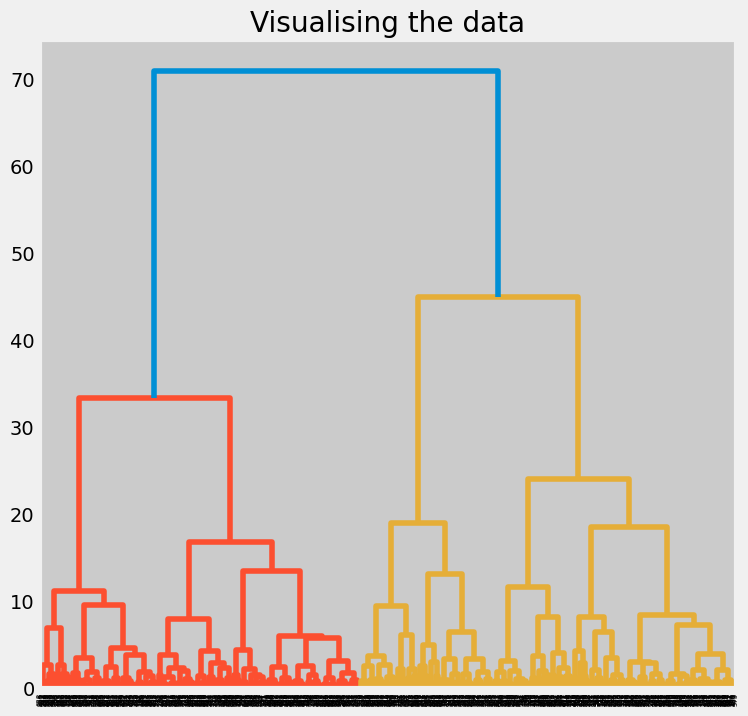

In [9]:
# Visualitzem el dendograma
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as sch

plt.figure(figsize =(8, 8))
plt.title('Visualising the data')
Dendrogram = sch.dendrogram((sch.linkage(df_principal, method ='ward')))

Observant la distancia màxima entre línies horitzontals i les línies verticals intersectades per la franja, veiem que el nombre òptim de clusters és 2

Visualitzem diferents models per diferents valors de clusters

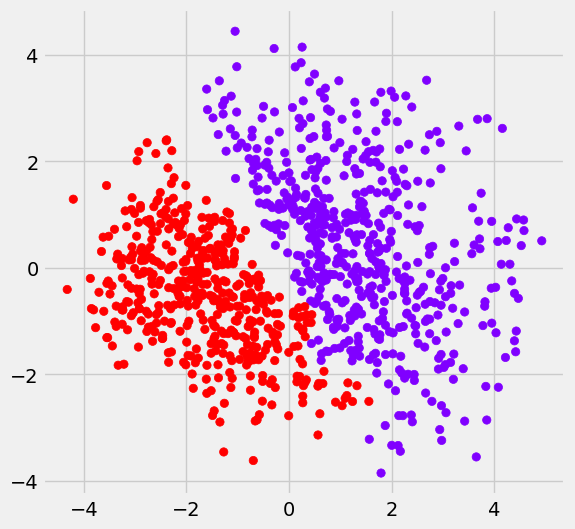

In [10]:
ac2 = AgglomerativeClustering(n_clusters = 2)

# Visualizing the clustering
plt.figure(figsize =(6, 6))
plt.scatter(df_principal['P0'], df_principal['P1'],
            c = ac2.fit_predict(df_principal), cmap ='rainbow')
plt.show()


Determinem ara el nombre òptim de clusters mitjançant una tècnica matemática. Utilitzarem el resulats de Silhouette per aquest propòsit.

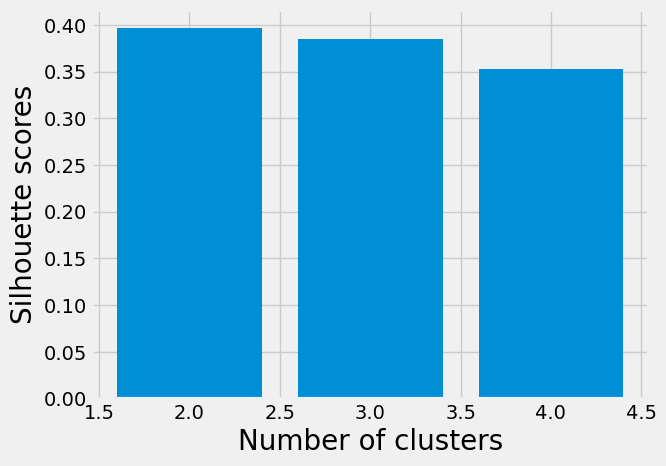

[0.39626344826879495, 0.3851453786647509, 0.3524478289784216]


In [11]:
k = [2, 3, 4,]

ac2 = AgglomerativeClustering(n_clusters = 2)
ac3 = AgglomerativeClustering(n_clusters = 3)
ac4 = AgglomerativeClustering(n_clusters = 4)


# Appending the silhouette scores of the different models to the list
silhouette_scores = []
silhouette_scores.append(
        silhouette_score(df_principal, ac2.fit_predict(df_principal)))
silhouette_scores.append(
        silhouette_score(df_principal, ac3.fit_predict(df_principal)))
silhouette_scores.append(
        silhouette_score(df_principal, ac4.fit_predict(df_principal)))

# Plotting a bar graph to compare the results
plt.bar(k, silhouette_scores)
plt.xlabel('Number of clusters', fontsize = 20)
plt.ylabel('Silhouette scores', fontsize = 20)
plt.show()
print(silhouette_scores)


Amb l'ajuda de Silhouette scores podem concloure que el nombre optim de clusters és 2.